<a href="https://colab.research.google.com/github/rerebebeccacca/20210602-machine-learing/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
from  urllib.request import urlretrieve
url = "https://github.com/rerebebeccacca/20210602-machine-learing/raw/main/titanic/train.csv"
urlretrieve(url,"train.csv")
url = "https://github.com/rerebebeccacca/20210602-machine-learing/raw/main/titanic/test.csv"
urlretrieve(url,"test.csv")

('test.csv', <http.client.HTTPMessage at 0x7f8c1aee7410>)

In [138]:
import pandas as pd
train_df = pd.read_csv("train.csv",encoding="utf-8")
test_df = pd.read_csv("test.csv",encoding="utf-8")

In [139]:
# test_df
# train_df

In [140]:
#兩份資料連結，並重置列編號
data = pd.concat([train_df,test_df],ignore_index=True)
data = data.drop(["PassengerId","Survived"],axis=1)

In [141]:
na = data.isna().sum()
na
#對Series做篩選
#Series[帶入跟你的資料筆數一樣多True/False list]
na[na > 0 ].sort_values(ascending=False )#sort_valusr排列

Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64

In [142]:
'''#篩選操作練習
s = pd.Series([1,2,3])
s[[True,False,False]]#外面[]篩選，裡面是list
'''

'#篩選操作練習\ns = pd.Series([1,2,3])\ns[[True,False,False]]#外面[]篩選，裡面是list\n'

In [143]:
'''練習
#lambda語法類似def
s = pd.Series([1,2,3])
# def func(n):
#   return n*n
s.apply(lambda n:n*n**3)#回傳值#功能跟def 一樣，但是用於幾行數值就能完成，遇到多數值就用def
'''

'練習\n#lambda語法類似def\ns = pd.Series([1,2,3])\n# def func(n):\n#   return n*n\ns.apply(lambda n:n*n**3)#回傳值#功能跟def 一樣，但是用於幾行數值就能完成，遇到多數值就用def\n'

In [144]:
#看cabin的資料
def cabin_head(s):
  if not pd.isna(s):#如果不是空值的話
    return s[0]

data["Cabin"] = data["Cabin"].apply(cabin_head)

In [145]:
#看Ticket資料
dic = data["Ticket"].value_counts()
# def ticket_count(t):
#   return t[0]
data["Ticket"] = data["Ticket"].apply(lambda t:dic[t])

In [146]:
#補缺失值（類別：缺失值會是補該欄位中的眾數，也就是最常出現的）[!如果一堆測試資料，不要重算，直接補S]，測試資料跟訓練資料要補一樣的值
most = data["Embarked"].value_counts().idxmax()#找最大值的索引index
data["Embarked"] = data["Embarked"].fillna(most)#fillna補空值
# most #如果去掉idxmax，印出可以得知欄位中出現的數量
na = data.isna().sum()
#對Series做篩選
#Series[帶入跟你的資俵比數一樣多True/False list]
na[na > 0 ].sort_values(ascending=False )#sort_valusr排列

Cabin    1014
Age       263
Fare        1
dtype: int64

In [147]:
#一、補缺失值（數值：中位數）
med = data.median().drop(["Pclass"])
data = data.fillna(med)
na = data.isna().sum()
#對Series做篩選
#Series[帶入跟你的資俵比數一樣多True/False list]
na[na > 0 ].sort_values(ascending=False )#sort_valusr排列

Cabin    1014
dtype: int64

In [148]:
data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,1,7.2500,None,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,2,71.2833,C,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,1,7.9250,None,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,2,53.1000,C,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,1,8.0500,None,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,28.0,0,0,1,8.0500,None,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,3,108.9000,C,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,1,7.2500,None,S
1307,3,"Ware, Mr. Frederick",male,28.0,0,0,1,8.0500,None,S


In [149]:
def name_convert(s):
  s = s.split(",")[-1].split(".")[0]
  s = s.strip()
  return s
counts = data["Name"].apply(name_convert).value_counts()
whitelist = counts[counts > 50].index
def name_convert(s):
  s = s.split(",")[-1].split(".")[0]
  s = s.strip()
  if s in whitelist:
    return s
  else:
    return None 
data["Name"] = data["Name"].apply(name_convert)                               


In [150]:
#做one-hotencoding的語法：
data = pd.get_dummies(data)#取得所有的欄位
data = pd.get_dummies(data, columns=["Pclass"])#可做可不做，因傖等為大小關係型態#此行就是前面那行沒跑出Pclass，所以特別在加註一次要跑one-hot encoding
data

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [151]:
#模型建立完，後續的嘗試，只是老師嘗試過，所以老師直接做
data["Family"] = data["SibSp"] + data["Parch"]#不可刪除SibSp和Parch#增加Family欄位
data

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [152]:
print(len(data))
print(data.shape)#取得欄數和列數

1309
(1309, 26)


In [153]:
# .loc(根據列編號)(x)  .iloc(根據第幾個)(O)
# .iloc(第一列，第二列，第三列...)
x_train = data.iloc[:train_df.shape[0]]
y_train = train_df["Survived"]
# x_train
x_predict = data.iloc[train_df.shape[0]:]


In [154]:
'''RandomForestClassifier'''
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
params = {
    #參數方法：1. 5 ,2.[1,2,3] , 3.range
    "n_estimators":range(20,100),#20-99
    "max_depth":range(3,11)#3-10
}
clf = RandomForestClassifier()
cv = GridSearchCV(clf, params, cv=10, n_jobs=-1)
cv.fit(x_train,y_train)
print(cv.best_score_)
print(cv.best_params_)

0.8440324594257179
{'max_depth': 7, 'n_estimators': 59}


In [155]:
clf = RandomForestClassifier(n_estimators=9,max_depth=7)#可以參數自由調整看平均高的
scores = cross_val_score(clf,x_train,y_train, cv=10, n_jobs=-1)
print("10:",scores)
print("average:", np.average(scores))

10: [0.81111111 0.86516854 0.7752809  0.88764045 0.86516854 0.83146067
 0.82022472 0.78651685 0.87640449 0.86516854]
average: 0.838414481897628


In [156]:
clf =RandomForestClassifier(n_estimators=9, max_depth=7)
clf.fit(x_train,y_train)
pre = clf.predict(x_predict)
df = pd.DataFrame({
    "PassengerId":test_df["PassengerId"],
    "Survived":pre
})
df.to_csv("rf.csv",encoding="utf-8", index=False)
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
print(len(clf.estimators_))
plt.figure(figsize=(10, 10))
plot_tree(clf.estimators_[2], 
          feature_names=data.columns, 
          class_names=["Dead", "Alived"],
          max_depth=2,
          filled=True)

In [158]:
'''
#用決策樹試試看
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
print(len(clf.estimators_))
plt.figure(figsize=(10,10))
plot_tree(clf.estimators_[0],#看每一顆決策樹的樣子,[1],[2]
          feature_names=data.columns,
          class_names=["Dead","Alived"],
          max_depth=2,
          filled=True)
'''

'\n#用決策樹試試看（畫圖時機是因為知道哪些是重要的才畫，而不是前期什麼都還搞不清重要資料就畫圖\nimport matplotlib.pyplot as plt\nfrom sklearn.tree import plot_tree\nprint(len(clf.estimators_))\nplt.figure(figsize=(10,10))\nplot_tree(clf.estimators_[0],#看每一顆決策樹的樣子,[1],[2]\n          feature_names=data.columns,\n          class_names=["Dead","Alived"],\n          max_depth=2,\n          filled=True)\n'

In [161]:
pd.DataFrame({
  "Name":data.columns,
  "Importance":clf.feature_importances_
}).sort_values(by="Importance",ascending=False)
# sum(clf.feature_importances_)

1.0000000000000002

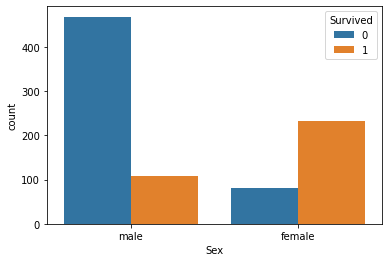

In [162]:
# 畫圖時機是因為知道哪些是重要的才畫，而不是前期什麼都還搞不清重要資料就畫圖
import seaborn as sns
sns.countplot(x=train_df["Sex"], hue=train_df["Survived"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

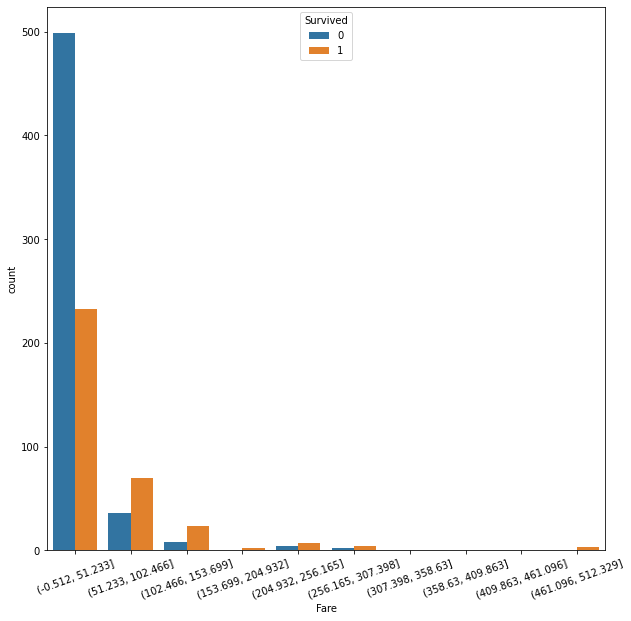

In [165]:
plt.figure(figsize=(10,10))
c = pd.cut(train_df["Fare"],bins=10)
sns.countplot(c, hue=train_df["Survived"])
plt.xticks(rotation=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

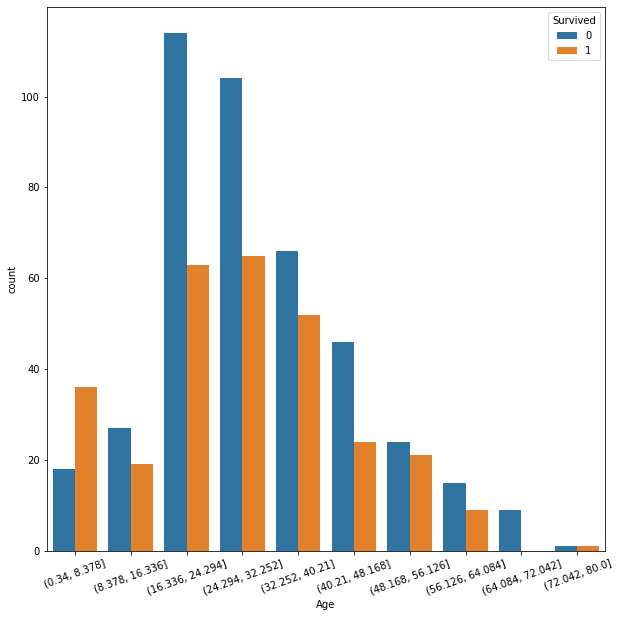

In [166]:
plt.figure(figsize=(10,10))
c = pd.cut(train_df["Age"],bins=10)
sns.countplot(c,hue=train_df["Survived"])
plt.xticks(rotation=20)

In [167]:
'''Scaling 縮放方法，這裡使用方法：MinMaxSxaler'''
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)
data_scale = pd.DataFrame(data_scale, columns=data.columns)
# .loc(根據列編號)(x)  .iloc(根據第幾個)(O)
# .iloc(第一列，第二列，第三列...)
x_train_scale = data_scale.iloc[:train_df.shape[0]]
x_predict_scale = data_scale.iloc[train_df.shape[0]:]
x_train_scale

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,0.273456,0.125,0.000000,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.1
1,0.473882,0.125,0.000000,0.1,0.139136,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.1
2,0.323563,0.000,0.000000,0.0,0.015469,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.436302,0.125,0.000000,0.1,0.103644,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.1
4,0.436302,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.336089,0.000,0.000000,0.0,0.025374,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
887,0.235876,0.000,0.000000,0.0,0.058556,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
888,0.348616,0.125,0.222222,0.3,0.045771,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.3
889,0.323563,0.000,0.000000,0.0,0.058556,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [168]:
'''KNeighborsClassifier'''
from sklearn.neighbors import KNeighborsClassifier
params = {
    "n_neighbors":range(3,100),#3-99
}
clf = KNeighborsClassifier()
cv = GridSearchCV(clf, params, cv=10, n_jobs=-1)
cv.fit(x_train_scale,y_train)
print(cv.best_score_)
print(cv.best_params_)

0.832796504369538
{'n_neighbors': 7}


In [169]:
clf = KNeighborsClassifier (n_neighbors=11)
clf.fit(x_train_scale,y_train)
pre = clf.predict(x_predict_scale)
df = pd.DataFrame({
    "PassengerId":test_df["PassengerId"],
    "Survived":pre
})
df.to_csv("knn.csv",encoding="utf-8", index=False)
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
